<a href="https://colab.research.google.com/github/MariemShn/Prediction-of-Product-Sales/blob/main/Project_1_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author : Mariem Sahnoun

## Project Overview

## Load and inspect Data

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(fpath)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [203]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [204]:
df.shape

(8523, 12)

In [205]:
# Data types of each variable
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [206]:
# Searching for duplicates
df.duplicated().sum()

0

In [207]:
# Identifying missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [208]:
df.isna().sum() / len(df) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

We can see that 17 % of the Item_Weight column's values and 28% of the Outlet_Size column's values are missing.



For the Item_weight column, since it is a numeric column, we could use 3 different strategies to deal with the missing values:

Strategy #1: drop the missing values.

Strategy #2: fill them in with the most frequent value for this feature.

Strategy #3: fill them in with the mean / median for this feature

To maintain as much data as possible, we will not drop the data. So we will choose either Strategy #2 or Strategy #3. To make this choice we will do a bit more investigating.

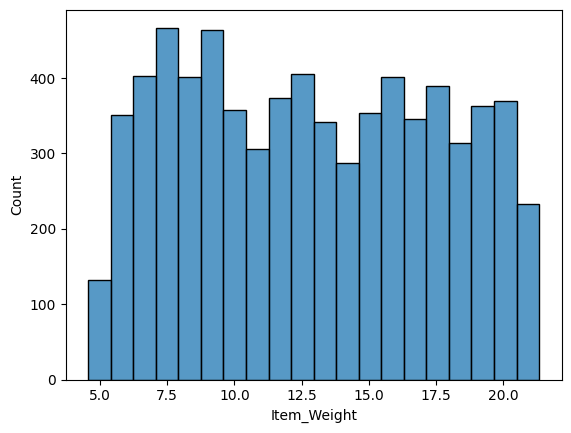

In [209]:
ax = sns.histplot(data = df, x = 'Item_Weight')

In [210]:
df['Item_Weight'].mean()

12.857645184135976

In [211]:
df['Item_Weight'].median()

12.6

Since most of the values in the histogram above are around 12, I will choose to fill in the values with the mean.

In [212]:
# Using a placeholder value (mean) for the column Item_weight
mean_value = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(mean_value)

In [213]:
#Checking to make sure the values for the Item_Wheight column were filled in
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Since the Outlet_Size column is a categorical column, we will choose one of these 3 strategies

Strategy #1: To deal with the missing values, we could simply drop the missing values.

Strategy #2: To deal with the missing values, we could fill them in with the most frequent for this feature.

Strategy #3: To deal with the missing values, we could fill them in with the word Missing for this feature.

We will select Strategy #3 so that the values will be filled in, but we will still be aware that those values are missing.

In [214]:
# Using a placeholder value for the column Outlet_Size
df['Outlet_Size'] = df_salespred['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [215]:
# Verification that there are no more missing values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [216]:
# Looking for inconsistent data
columns = df.columns
for col in columns:
  print(f'Value counts for {col}')
  print(df[col].value_counts())
  print('\n')


Value counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value counts for Item_Weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: Item_Weight, Length: 416, dtype: int64


Value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value counts for Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


Value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Househol

In [217]:
# Fixing inconsistent data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg':'Regular','LF':'Low Fat', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [218]:
#Statistics summary of numerical columns
num_columns = df_salespred.select_dtypes('number').columns
df[num_columns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

## Feature Inspection